In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
dataFrame = pd.read_csv("./student/student-por.csv",sep=";")

In [3]:
def MakeBoxPlot(X,Y,title):
    fig = plt.figure(figsize=(8,8))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sns.set_style("whitegrid")

    sns.set_context("talk")
    ax = sns.boxplot(x=X, y=Y)
    plt.show()

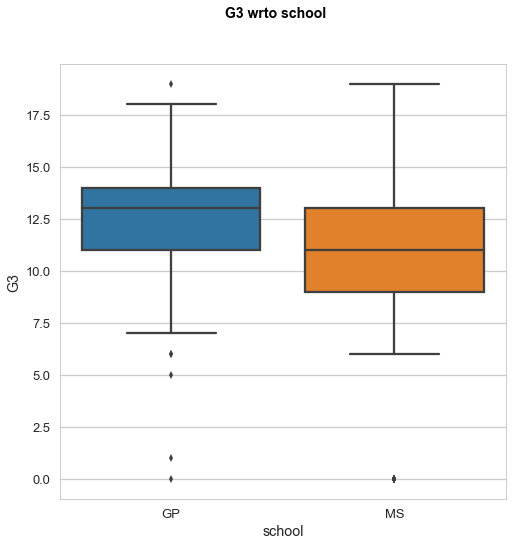

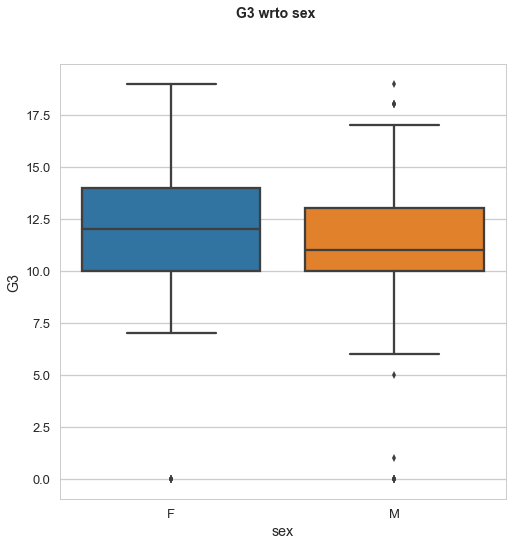

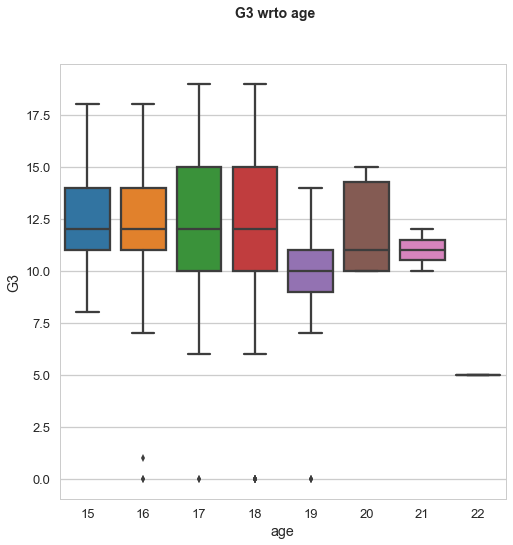

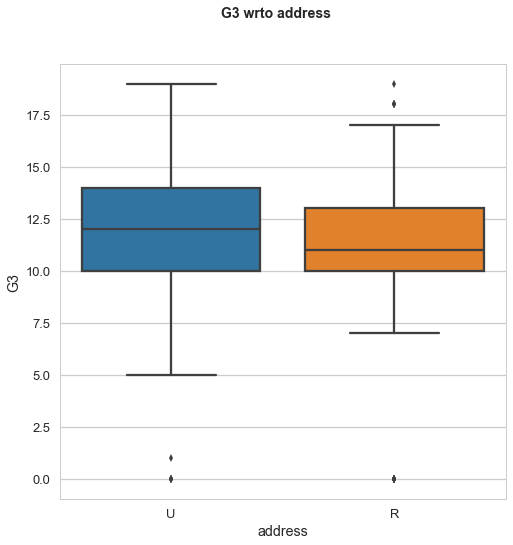

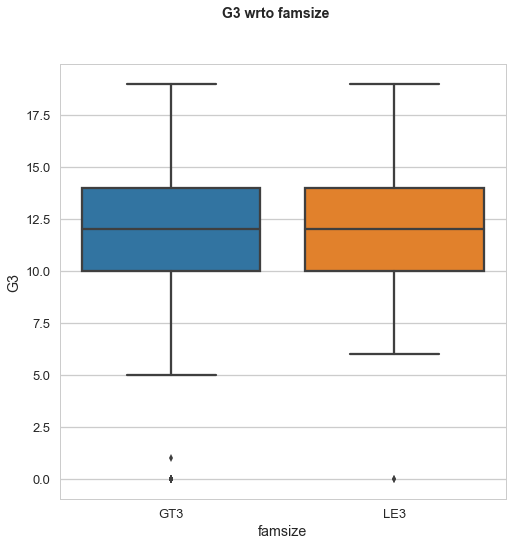

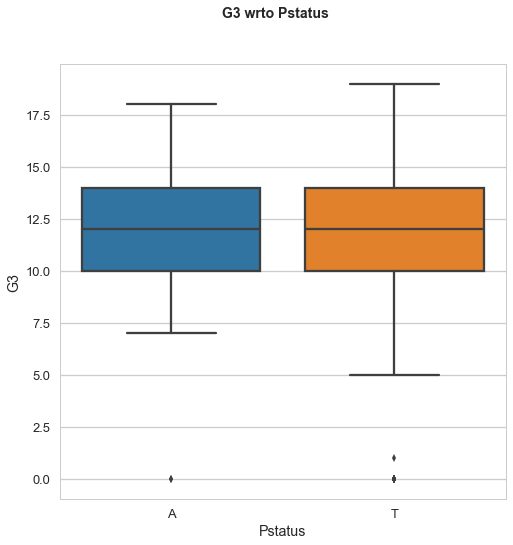

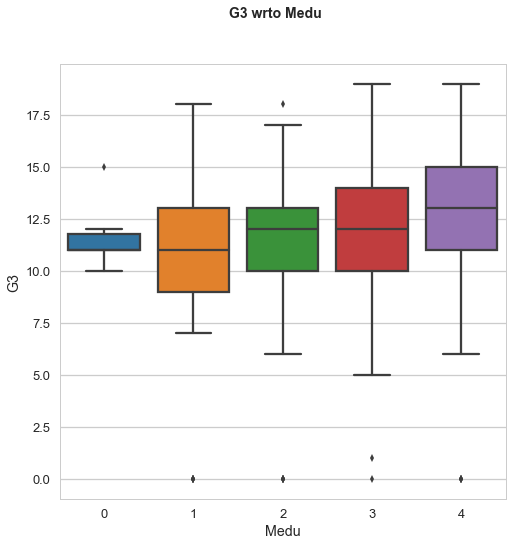

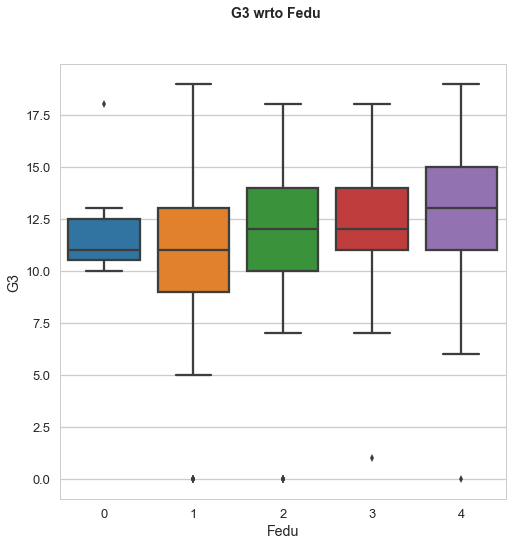

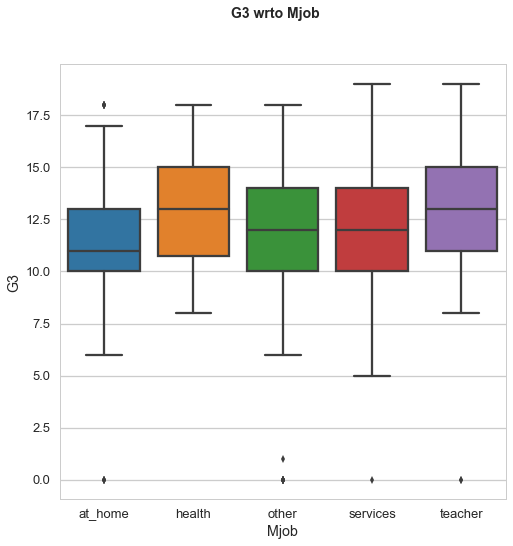

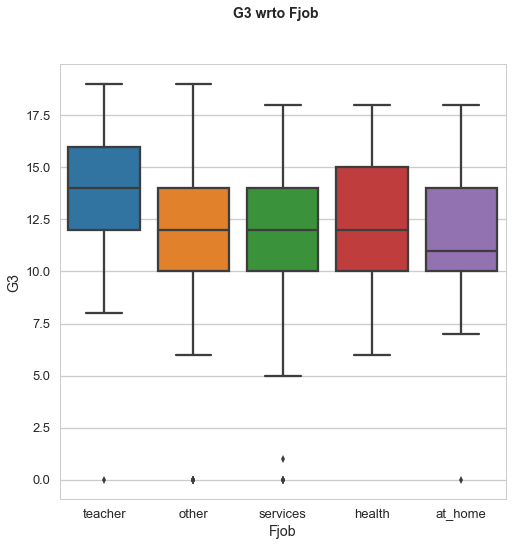

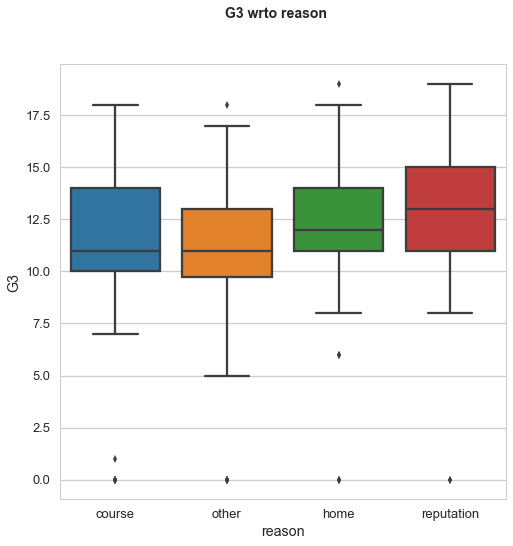

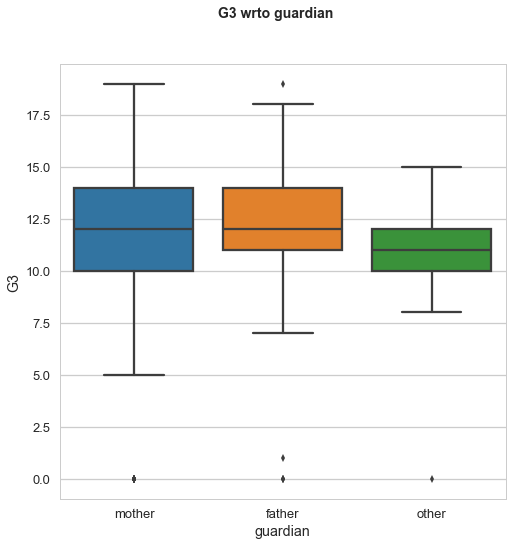

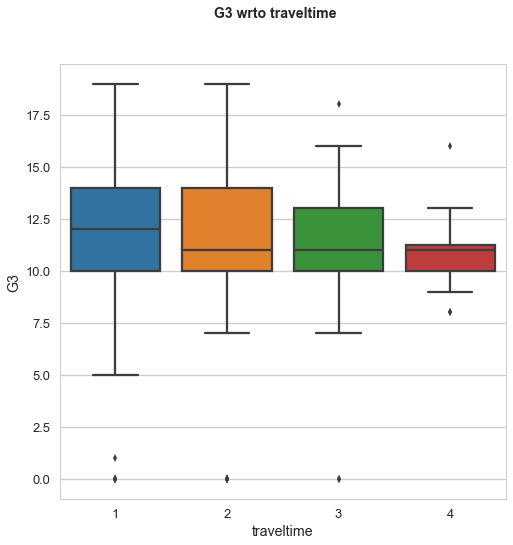

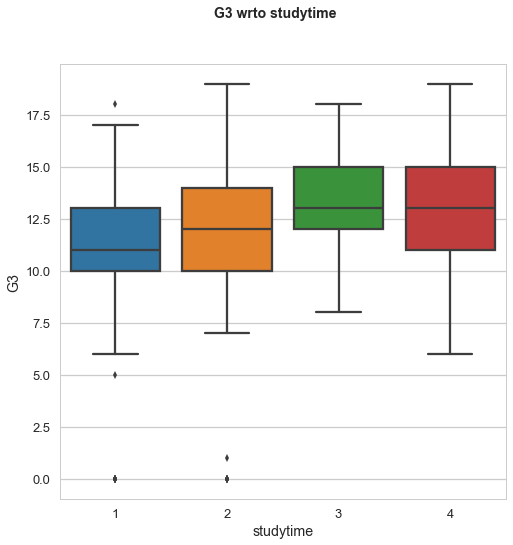

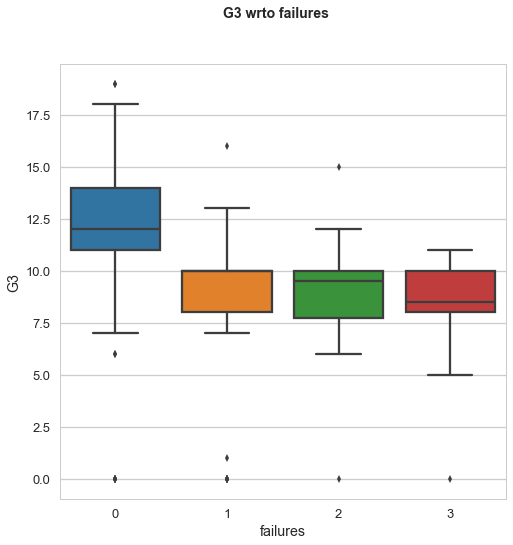

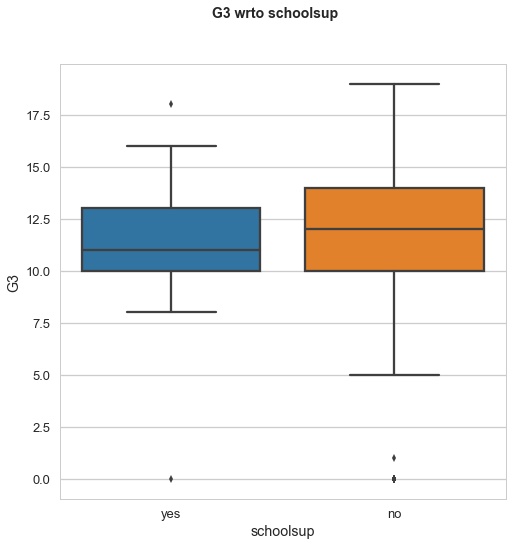

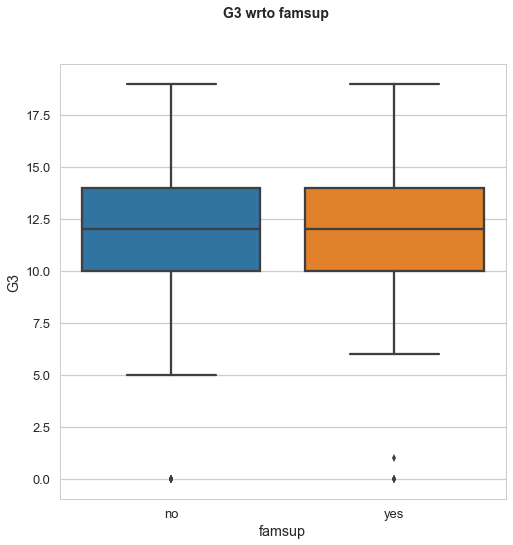

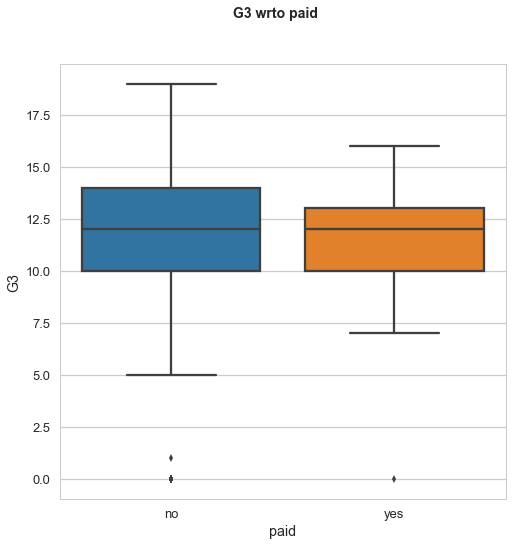

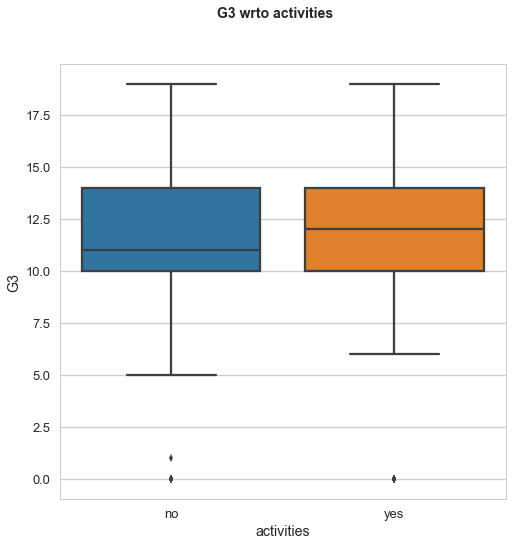

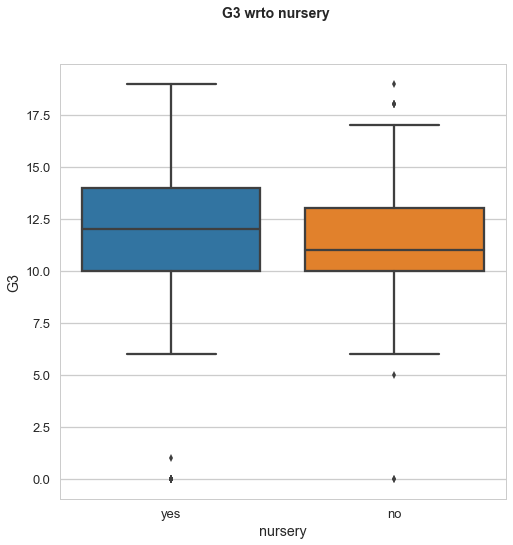

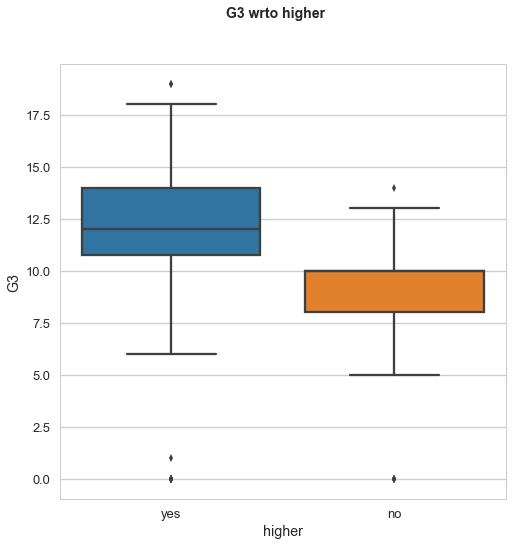

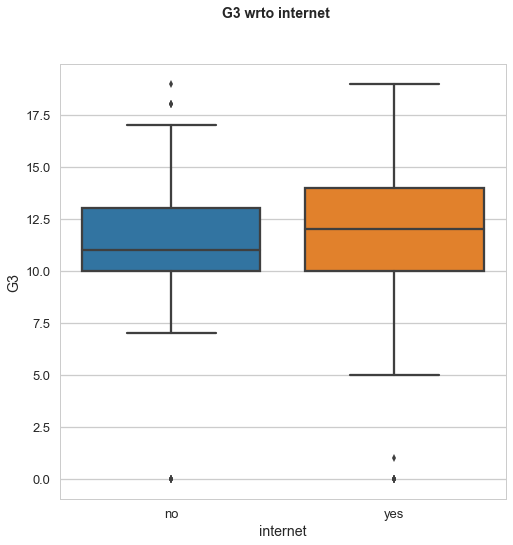

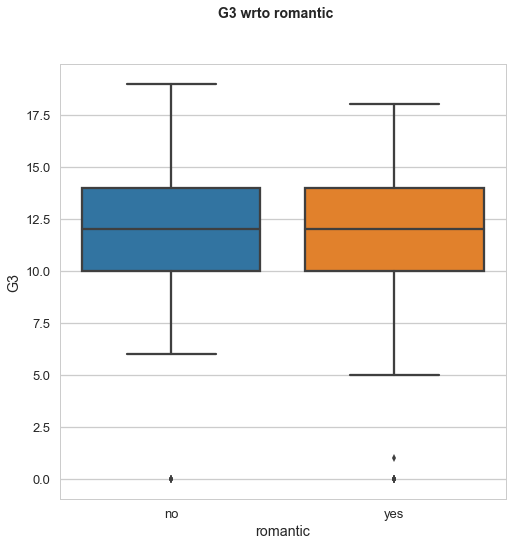

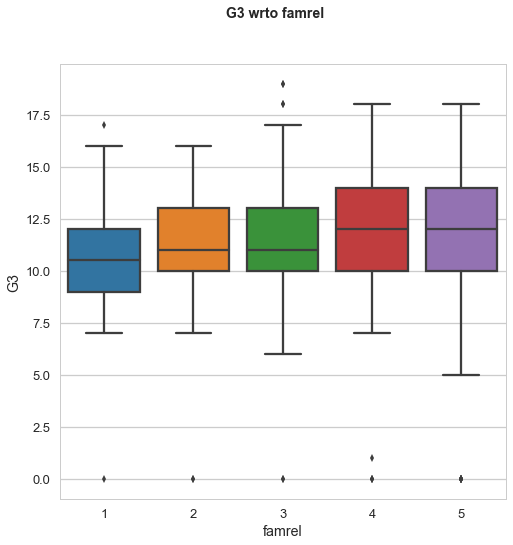

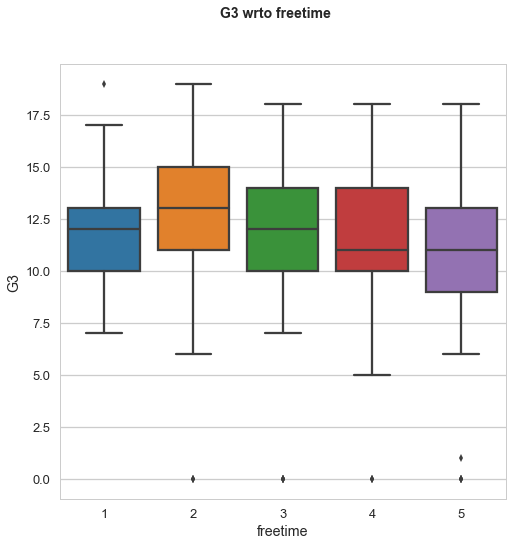

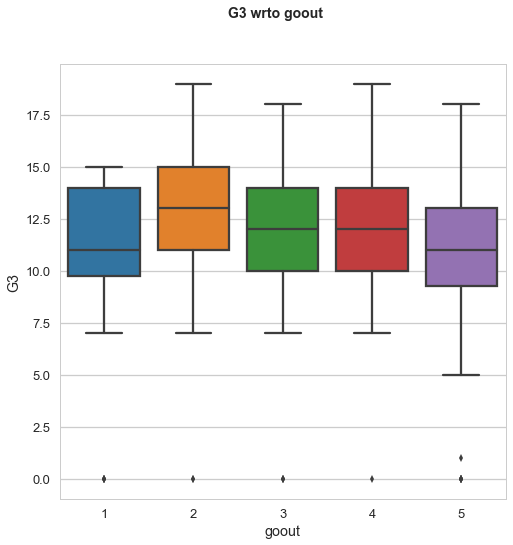

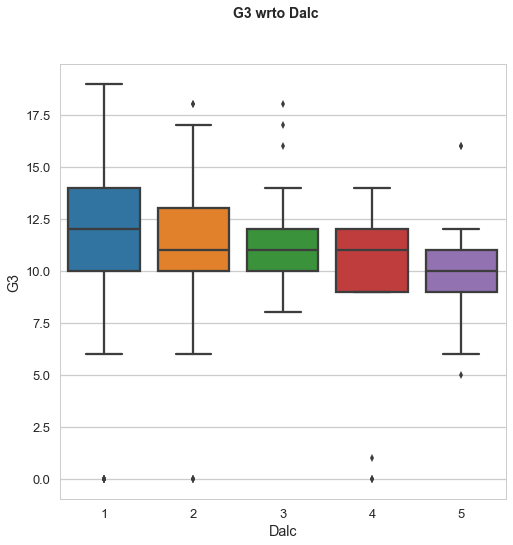

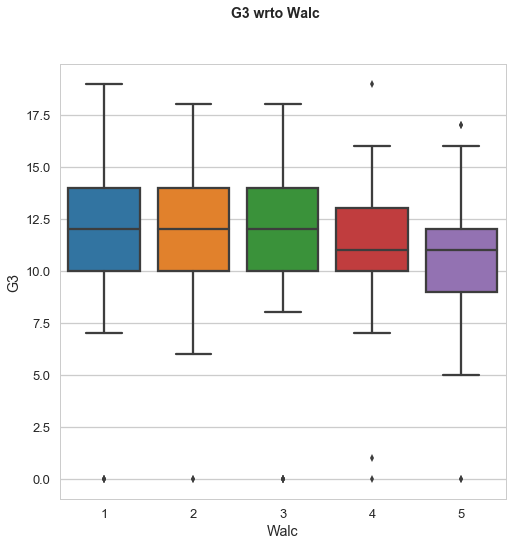

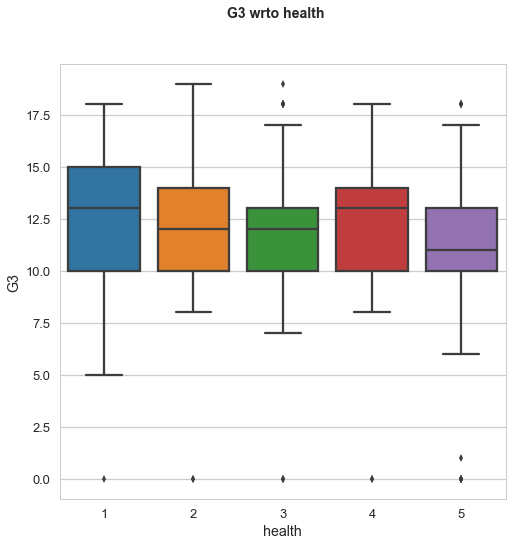

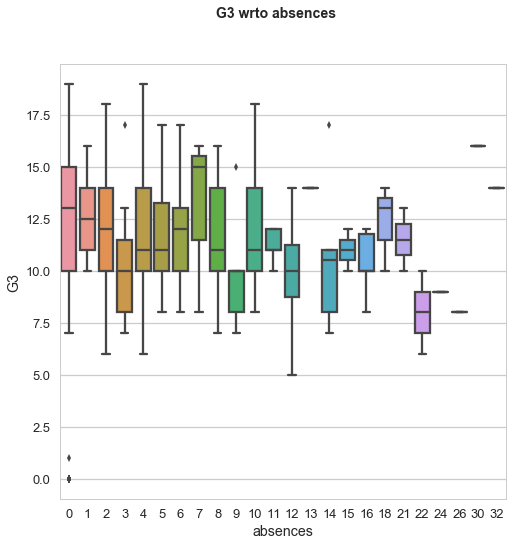

In [4]:
colNames=list(dataFrame)
for i in range(0,len(colNames)-3):
        MakeBoxPlot(dataFrame[colNames[i]],dataFrame[colNames[-1]],"G3 wrto "+colNames[i])

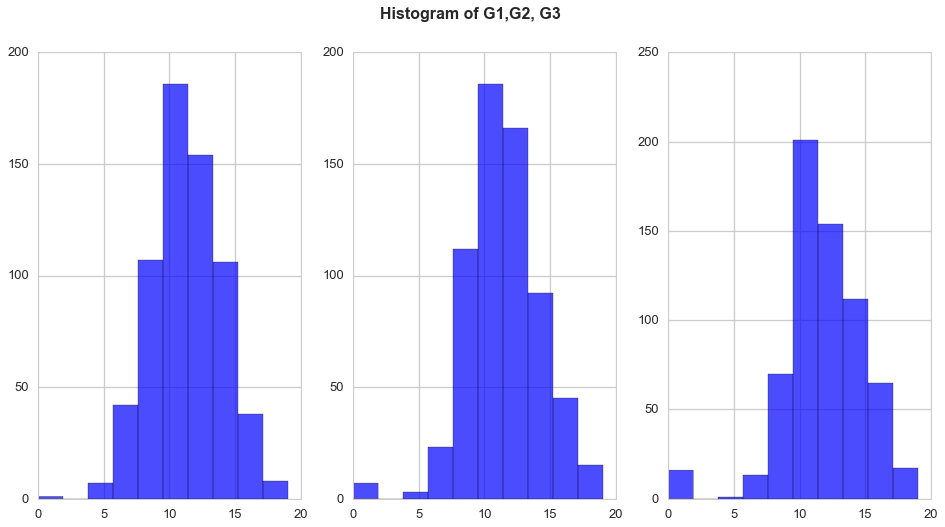

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
#fig = plt.figure(figsize=(10,8))
axes[0].hist(dataFrame["G1"], alpha=.7)
axes[1].hist(dataFrame["G2"], alpha=.7)
axes[2].hist(dataFrame["G3"], alpha=.7)
fig.suptitle("Histogram of G1,G2, G3", fontsize=16, fontweight='bold')
plt.show()

In [5]:
import scipy as sp

In [6]:

for i in range(0,len(colNames)-3):
        rho, pval = sp.stats.spearmanr(dataFrame[colNames[i]],dataFrame["G3"])
        print(str(colNames[i])+"vs G3: "+str(rho)+" "+str(pval))

schoolvs G3: -0.285317294378 1.27126318672e-13
sexvs G3: -0.134266071855 0.000604831326849
agevs G3: -0.0662769480483 0.0915961744994
addressvs G3: 0.169675330588 1.3878372263e-05
famsizevs G3: 0.0191148798322 0.626920102583
Pstatusvs G3: -0.00512392733895 0.896341961622
Meduvs G3: 0.283925262285 1.68821157416e-13
Feduvs G3: 0.234633076769 1.44369718019e-09
Mjobvs G3: 0.175537951904 6.85100561836e-06
Fjobvs G3: 0.0502552270033 0.201032343427
reasonvs G3: 0.154557561947 7.6978205013e-05
guardianvs G3: -0.0953373089975 0.0151147542328
traveltimevs G3: -0.146947715856 0.000172128056967
studytimevs G3: 0.274711848336 1.06062403827e-12
failuresvs G3: -0.448360300081 2.04746001721e-33
schoolsupvs G3: -0.0874051794232 0.0259700685238
famsupvs G3: 0.0293615741083 0.455233084382
paidvs G3: -0.0566495575487 0.149429283116
activitiesvs G3: 0.0819733141724 0.036816031645
nurseryvs G3: 0.0524535397998 0.182000134237
highervs G3: 0.353217703536 1.66493790047e-20
internetvs G3: 0.15706358252 5.856394

C:\Programs\Anaconda\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [166]:
features = ["school","address","sex","Medu","Fedu","Mjob",
            "higher","Dalc","reason","traveltime","studytime",
            "failures","internet","absences"]
dF= dataFrame[dataFrame.columns[:-3]]
#dF= dF[features]

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

for col in dF.columns:
    if(isinstance(dF[col][0],str)):
        le = preprocessing.LabelEncoder()
        le.fit(dF[col])
        dF[col]=le.transform(dF[col])
    
target=[]
for i in range(0,len(dataFrame["school"])):
        if(dataFrame["G3"][i]<10):
            target.append(0)
        else:
            if(dataFrame["G3"][i]<12):
                target.append(1)
            else:
                if(dataFrame["G3"][i]<15):
                    target.append(2)
                else:
                    target.append(3)
        
binarizer = preprocessing.Binarizer().fit(dF)  # fit does nothing

dF01=binarizer.transform(dF)
        
clf = DecisionTreeClassifier(random_state=1)
scores=cross_val_score(clf,dF01, target, cv=10)
print(scores)


[ 0.23880597  0.29230769  0.33846154  0.44615385  0.4         0.26153846
  0.29230769  0.4375      0.265625    0.40625   ]


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dF, target, test_size=0.8, random_state=0)


[ 0.87692308  0.86153846  0.78461538  0.84615385  0.81538462  0.87692308
  0.83076923  0.63076923  0.69230769  0.765625  ]
[ 0.68181818  0.58461538  0.63076923  0.58461538  0.56923077  0.64615385
  0.63076923  0.55384615  0.5         0.65625   ]
[ 0.40909091  0.5         0.58461538  0.53846154  0.43076923  0.49230769
  0.58461538  0.578125    0.6875      0.65625   ]
[ 0.65151515  0.72307692  0.67692308  0.67692308  0.78461538  0.6
  0.64615385  0.69230769  0.765625    0.59375   ]


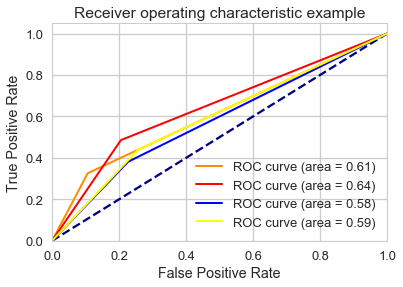

In [185]:

from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp



y = label_binarize(target, classes=[0, 1, 2,3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(dF, y, test_size=0.4, random_state=0)
print(cross_val_score(clf,dF,y[:,0],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,1],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,2],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,3],cv=10,scoring="accuracy"))

# Learn to predict each class against the other
clfs=[DecisionTreeClassifier(random_state=0),DecisionTreeClassifier(random_state=0),
      DecisionTreeClassifier(random_state=0),DecisionTreeClassifier(random_state=0)]

clf = DecisionTreeClassifier(random_state=0)



def PlotROC(clf,X_train,X_test,y_train,y_test,n_classes):
    y_score = clf.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        if(n_classes==1):
            fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
        else:
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.title('Receiver operating characteristic example')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    colors=['darkorange','red','blue','yellow']
    for i in range(0,n_classes):
        lw = 2
        plt.plot(fpr[i], tpr[i], color=colors[i],
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

        plt.legend(loc="lower right")

    plt.show()
    
    
##LEARNING CURVE

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



    
PlotROC(clf,X_train,X_test,y_train,y_test,n_classes)


In [135]:
len(dF["school"])

649

[ 0.84615385  0.84615385  0.83076923  0.84615385  0.84615385  0.84615385
  0.84615385  0.84615385  0.84615385  0.84375   ]
[ 0.6969697   0.69230769  0.69230769  0.63076923  0.64615385  0.70769231
  0.66153846  0.67692308  0.734375    0.71875   ]
[ 0.57575758  0.71212121  0.63076923  0.70769231  0.6         0.69230769
  0.63076923  0.65625     0.671875    0.671875  ]
[ 0.78787879  0.8         0.8         0.78461538  0.8         0.81538462
  0.8         0.8         0.796875    0.796875  ]


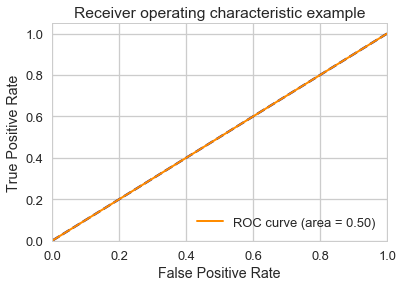

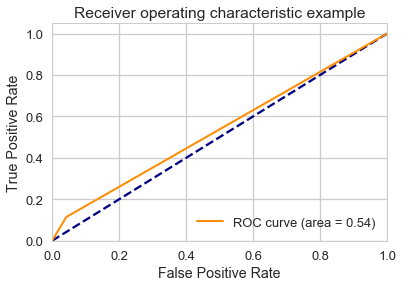

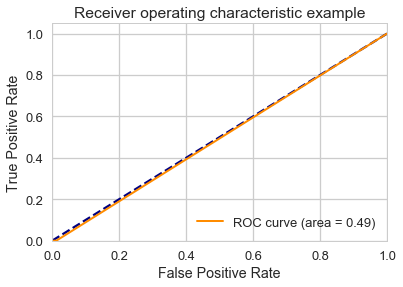

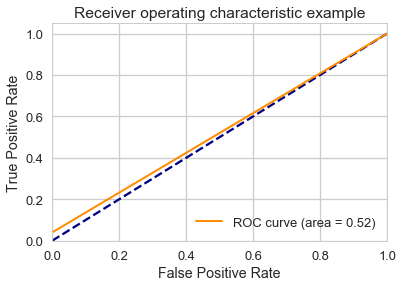

In [174]:
from sklearn.svm import SVC
clf = SVC()
binarizer = preprocessing.Binarizer().fit(dF)  # fit does nothing

dF01=binarizer.transform(dF)

y = label_binarize(target, classes=[0, 1, 2,3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(dF, y, test_size=0.4, random_state=0)

#PlotROC(clf,X_train,X_test,y_train,y_test,n_classes)
#clf.fit(X_train,y_train[:,0])
print(cross_val_score(clf,dF,y[:,0],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,1],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,2],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,3],cv=10,scoring="accuracy"))

clf = SVC()
PlotROC(clf,X_train,X_test,y_train[:,0],y_test[:,0],1)
PlotROC(clf,X_train,X_test,y_train[:,1],y_test[:,1],1)
PlotROC(clf,X_train,X_test,y_train[:,2],y_test[:,2],1)
PlotROC(clf,X_train,X_test,y_train[:,3],y_test[:,3],1)

[ 0.86153846  0.90769231  0.81538462  0.87692308  0.84615385  0.83076923
  0.81538462  0.75384615  0.69230769  0.71875   ]
[ 0.68181818  0.66153846  0.64615385  0.6         0.63076923  0.8
  0.69230769  0.53846154  0.484375    0.625     ]
[ 0.39393939  0.59090909  0.61538462  0.53846154  0.44615385  0.49230769
  0.66153846  0.5625      0.734375    0.53125   ]
[ 0.51515152  0.47692308  0.6         0.36923077  0.50769231  0.4
  0.58461538  0.6         0.578125    0.546875  ]


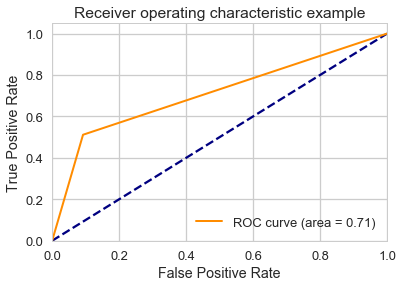

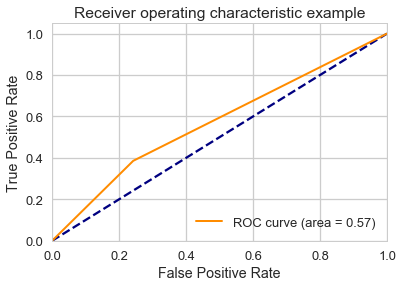

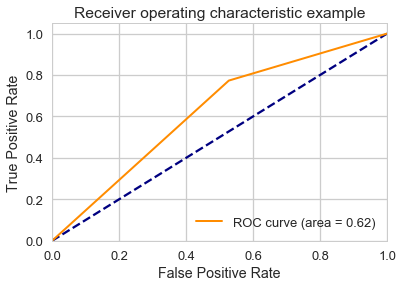

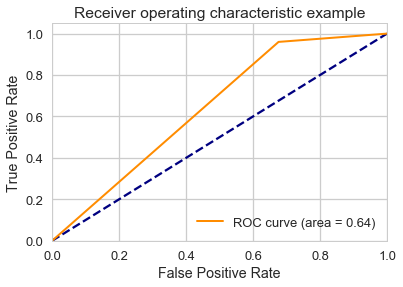

In [179]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(dF, y, test_size=0.4, random_state=0)

clf=GaussianNB()
print(cross_val_score(clf,dF,y[:,0],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,1],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,2],cv=10,scoring="accuracy"))
print(cross_val_score(clf,dF,y[:,3],cv=10,scoring="accuracy"))

clf=GaussianNB()
PlotROC(clf,X_train,X_test,y_train[:,0],y_test[:,0],1)
clf=GaussianNB()
PlotROC(clf,X_train,X_test,y_train[:,1],y_test[:,1],1)
clf=GaussianNB()
PlotROC(clf,X_train,X_test,y_train[:,2],y_test[:,2],1)
clf=GaussianNB()
PlotROC(clf,X_train,X_test,y_train[:,3],y_test[:,3],1)
